In [36]:
# Libraries download
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
#Download from Jupyter with the file already uploaded and display
# Load the dataset
df = pd.read_csv('Telco-Customer-Churn.csv')

# Display the first few rows of the dataset to understand its structure
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [38]:
#Data Overview:
#Check the dimensions of the dataset (number of rows and columns).
#Review the column names and their data types.

In [39]:
# Check dimensions of the dataset
print("Dataset dimensions is:", df.shape)

Dataset dimensions is: (7043, 21)


In [40]:
# Display column names and data types
print("\nColumn names and data types:\n", df.dtypes)


Column names and data types:
 customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [41]:
# Display all the info
df.info

<bound method DataFrame.info of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL 

In [42]:
#Summary Statistics:
#Compute summary statistics for numerical columns to understand central tendencies, dispersions, and ranges.

In [43]:
# Summary statistics for numerical columns
print("\nSummary statistics for numerical columns:\n", df.describe())


Summary statistics for numerical columns:
        SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [44]:
#Missing Values:
#Identify and handle missing values. Determine if any columns have missing values and decide on appropriate strategies such as imputation or removal.

In [45]:
# Check for missing values
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [46]:
#Unique Values:
#Explore unique values in categorical columns to understand the range of categories and potential data quality issues.

In [47]:
# Unique values in categorical columns
print("\nUnique values in categorical columns:\n")
for column in df.select_dtypes(include=['object']).columns:
    print(column, ":", df[column].unique())


Unique values in categorical columns:

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges : ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn : ['No' 'Yes']


In [48]:
#Outliers:
#Identify outliers in numerical columns that may skew analysis results. Decide on appropriate strategies to handle outlier

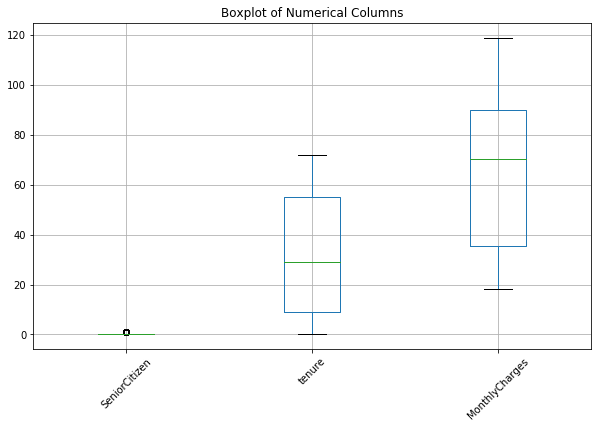

In [49]:
# Outliers detection using box plots
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
df.boxplot()
plt.title('Boxplot of Numerical Columns')
plt.xticks(rotation=45)
plt.show()

In [50]:
#Correlation Analysis:
#Compute correlations between numerical variables to identify potential relationships or multicollinearity issues.

In [51]:
# Correlation matrix
correlation_matrix = df.corr()
print("\nCorrelation matrix:\n", correlation_matrix)


Correlation matrix:
                 SeniorCitizen    tenure  MonthlyCharges
SeniorCitizen        1.000000  0.016567        0.220173
tenure               0.016567  1.000000        0.247900
MonthlyCharges       0.220173  0.247900        1.000000


In [52]:
#Data Preparation

#After understanding the dataset, the next step is to prepare the data for analysis. 
#This involves handling missing values, encoding categorical variables, scaling numerical features, and performing any necessary feature engineering. 


In [53]:
#Handle Missing Values:
#Determine the appropriate strategy for handling missing values, such as imputation or removal

In [54]:
# Impute missing values for numerical columns with mean
df.fillna(df.mean(), inplace=True)

In [55]:
# Impute missing values for categorical columns with mode
for column in df.select_dtypes(include=['object']).columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [56]:
#Encode Categorical Variables:
#Convert categorical variables into numerical representations using techniques like one-hot encoding or label encoding.

In [57]:
#in our dataset the following columns are categorical variables that you may consider encoding:
##gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection
#TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn

In [58]:
# Select columns for encoding
columns_to_encode = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                     'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                     'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                     'PaperlessBilling', 'PaymentMethod', 'Churn']

# Perform one-hot encoding for categorical variables
df_data_encoded = pd.get_dummies(df, columns=columns_to_encode)

# Display the encoded dataset
print(df_data_encoded.head())

   customerID  SeniorCitizen  tenure  MonthlyCharges TotalCharges  \
0  7590-VHVEG              0       1           29.85        29.85   
1  5575-GNVDE              0      34           56.95       1889.5   
2  3668-QPYBK              0       2           53.85       108.15   
3  7795-CFOCW              0      45           42.30      1840.75   
4  9237-HQITU              0       2           70.70       151.65   

   gender_Female  gender_Male  Partner_No  Partner_Yes  Dependents_No  ...  \
0              1            0           0            1              1  ...   
1              0            1           1            0              1  ...   
2              0            1           1            0              1  ...   
3              0            1           1            0              1  ...   
4              1            0           1            0              1  ...   

   Contract_One year  Contract_Two year  PaperlessBilling_No  \
0                  0                  0             

In [59]:
# Perform one-hot encoding for categorical variables
##df_data_encoded = pd.get_dummies
#(df, columns=['gender', 'Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
             #'TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn'])


In [60]:
#Exploratory Data Analysis (EDA)
#helps to understand the underlying structure, patterns, and relationships in the data. 

In [61]:
#Univariate Analysis Plot histograms for numerical variables such as 'tenure', 'MonthlyCharges', and 'TotalCharges' to understand their distributions.

In [67]:

# Set the style for seaborn plots
sns.set(style="whitegrid")

# Define numerical and categorical columns
numerical_columns = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                       'PaperlessBilling', 'PaymentMethod', 'Churn']




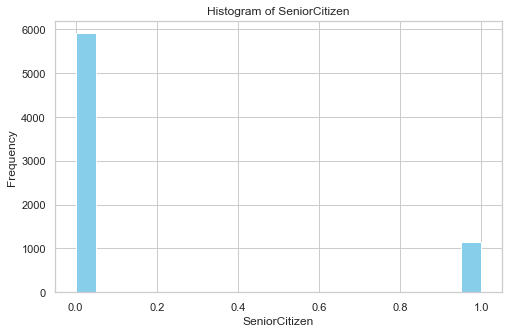

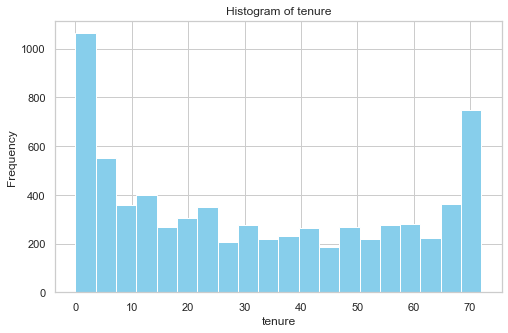

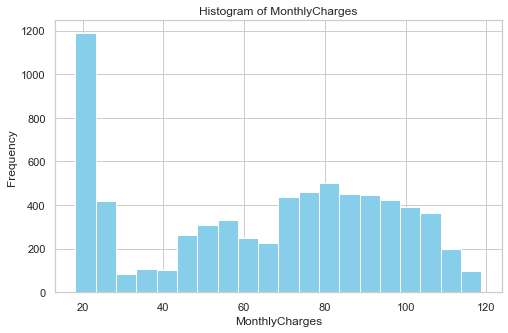

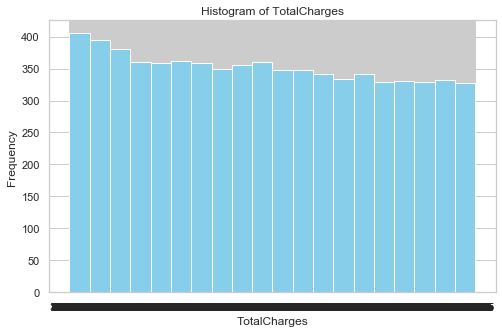

In [76]:
   # Plot histograms for numerical variables
for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    plt.hist(df[column], color='skyblue', bins=20)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


In [ ]:
#We first define the numerical and categorical columns in the dataset.
#We use seaborn's pairplot function to generate scatterplots for numerical variables, showing the relationships between them.
#We then loop through each categorical variable and create boxplots to visualize the relationship between that categorical variable and the 'tenure' numerical variable.
#The boxplots show the distribution of 'tenure' for each category of the categorical variable.

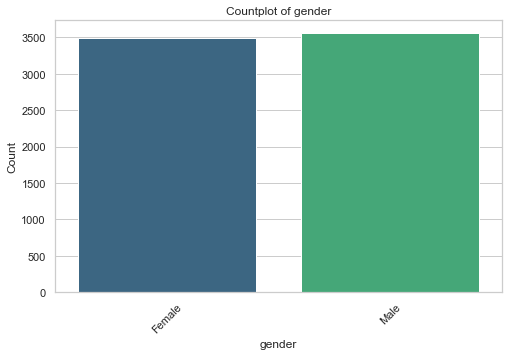

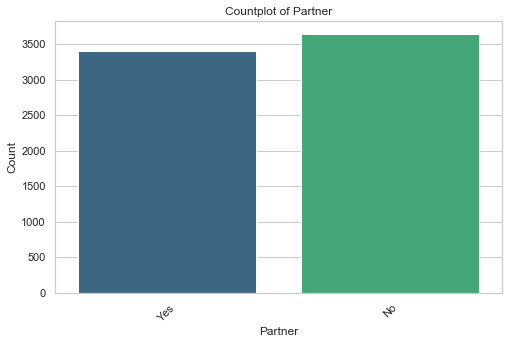

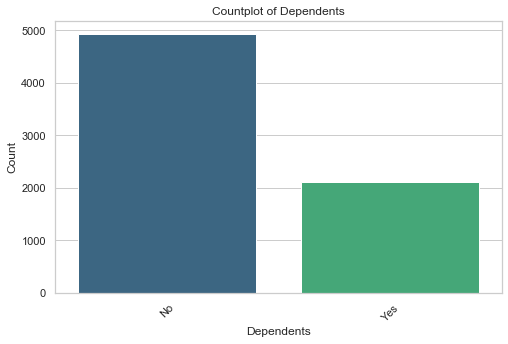

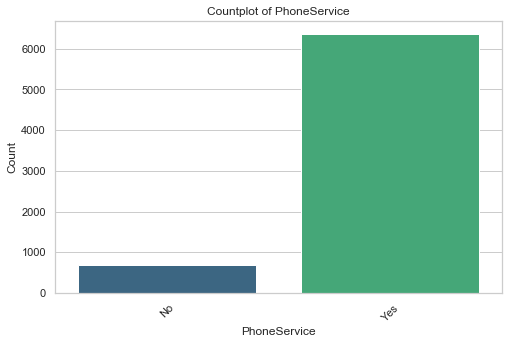

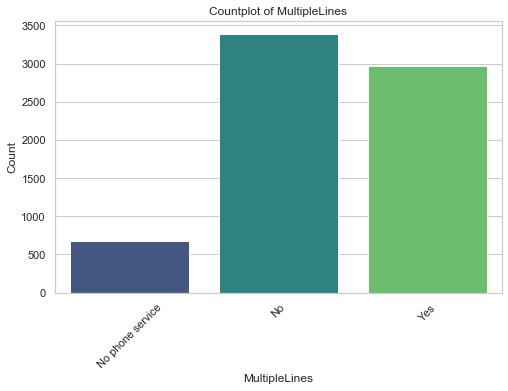

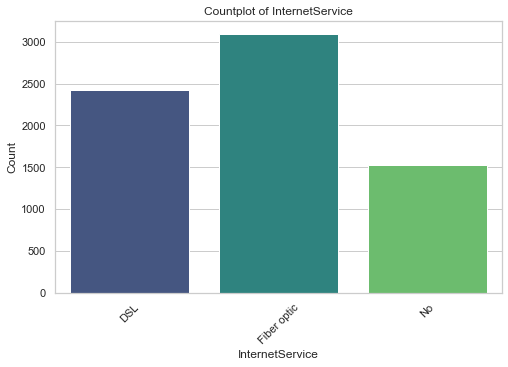

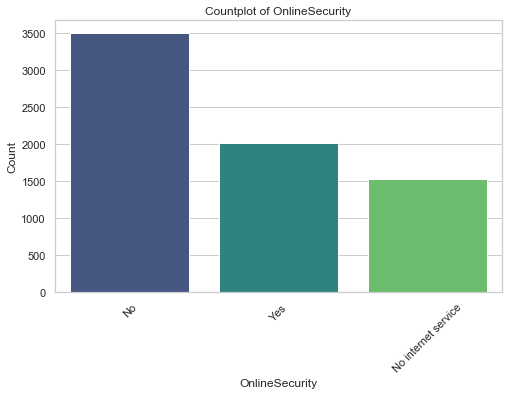

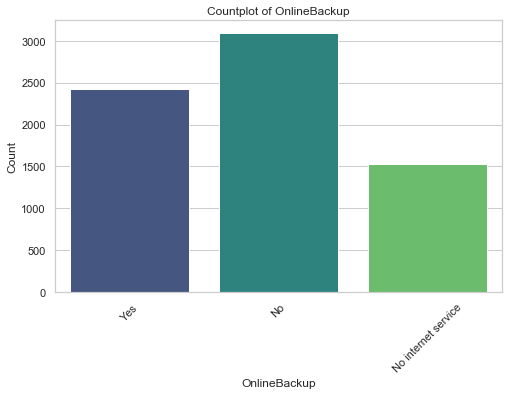

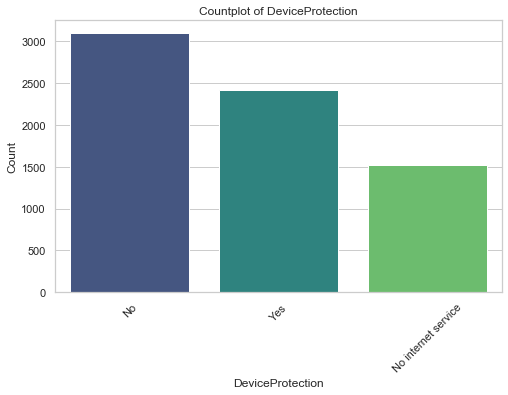

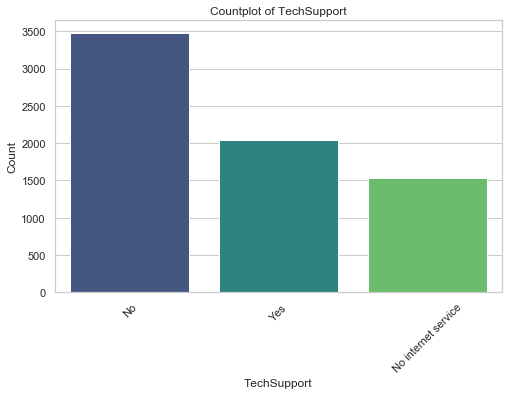

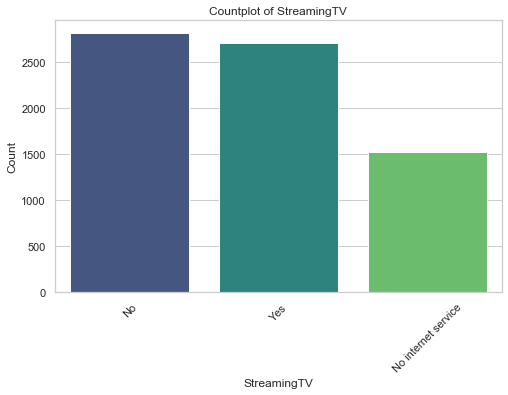

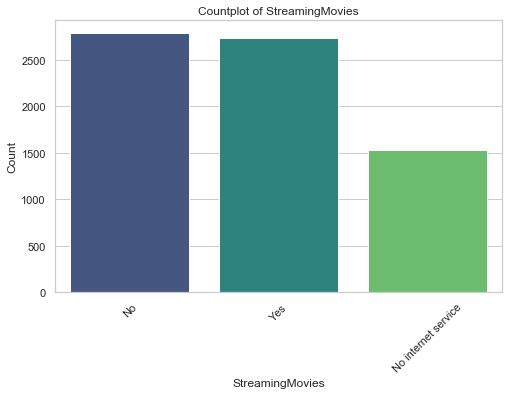

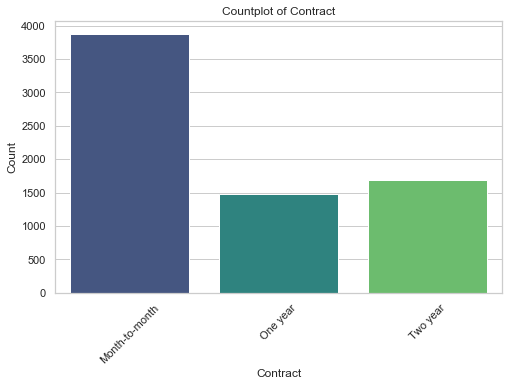

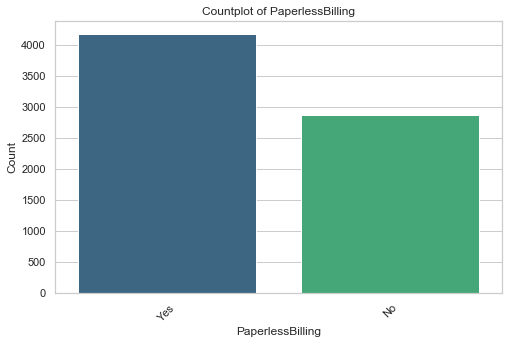

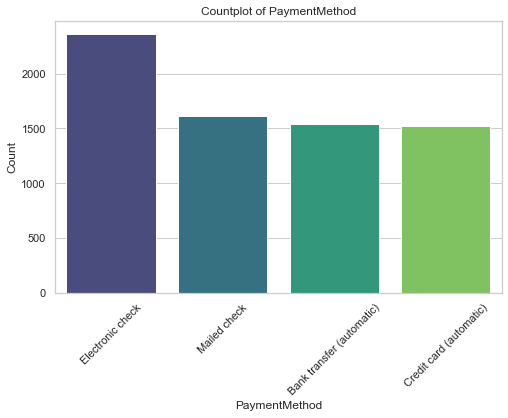

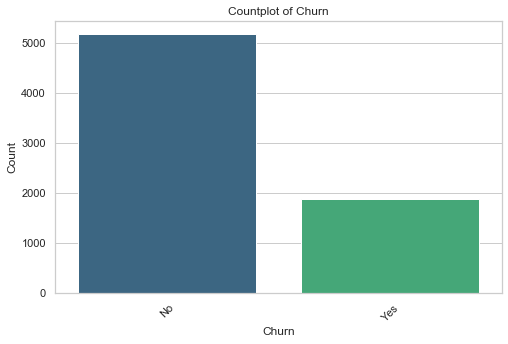

In [78]:
# Plot countplots for categorical variables
for column in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=column, palette='viridis')
    plt.title(f'Count#plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


In [79]:
#Bivariate Analysis 
#Bivariate analysis involves exploring the relationship between two variables in the dataset. 

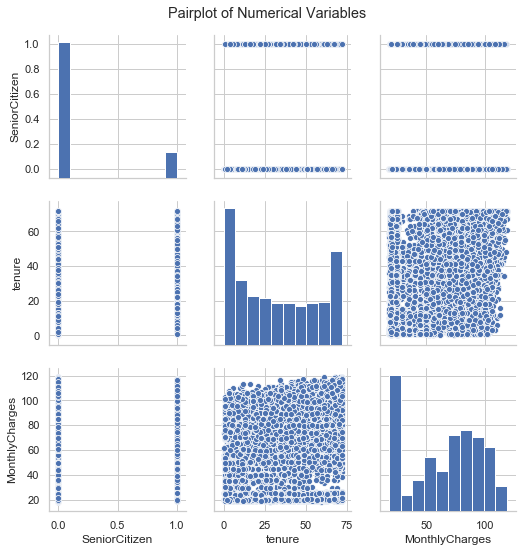

In [81]:
# Bivariate analysis: Scatterplots for numerical variables
sns.pairplot(df[numerical_columns])
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()

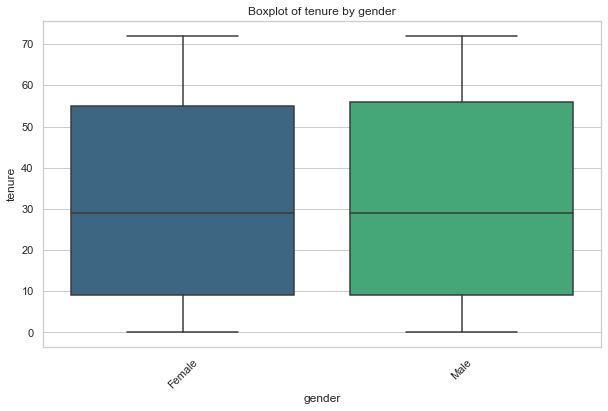

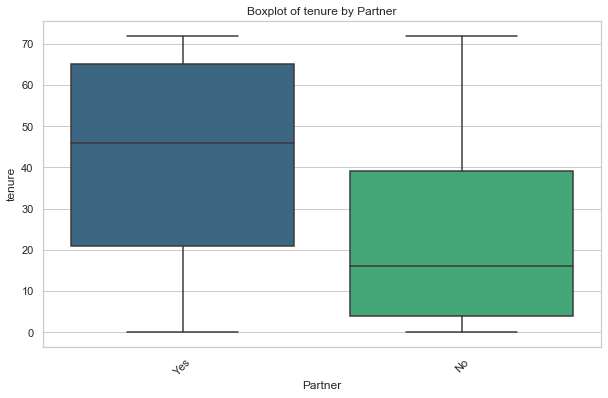

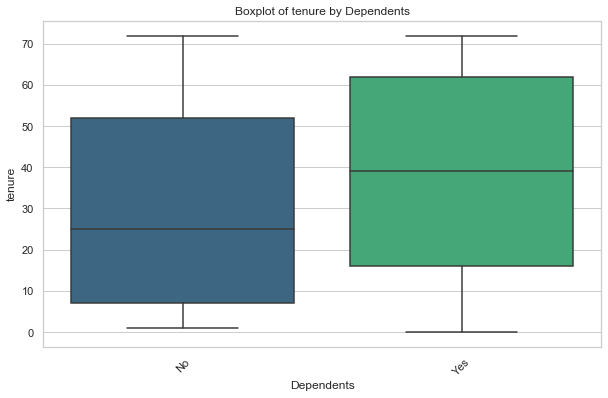

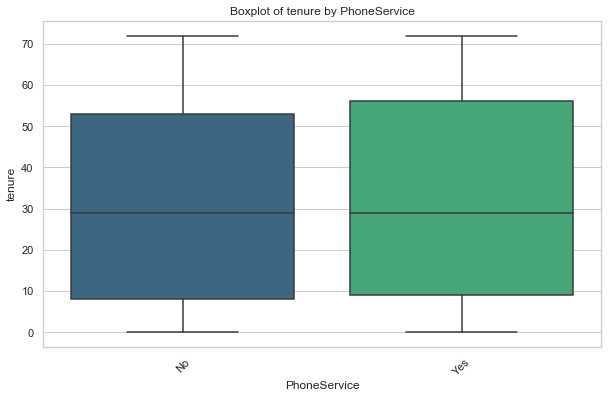

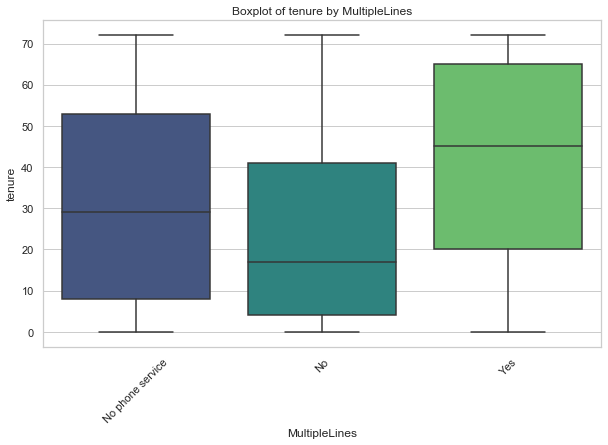

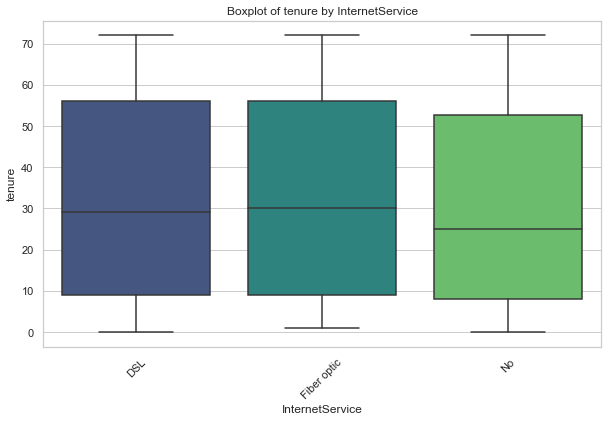

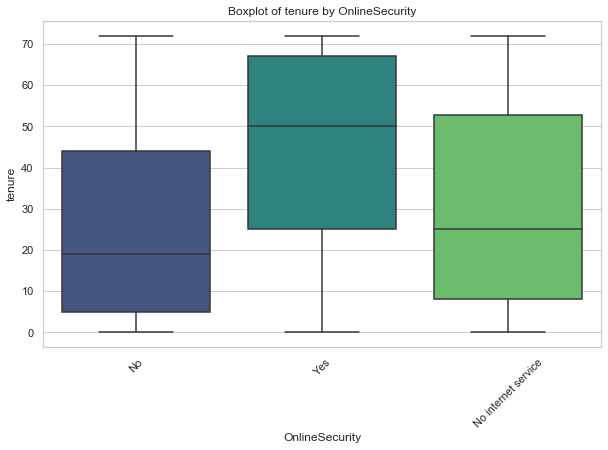

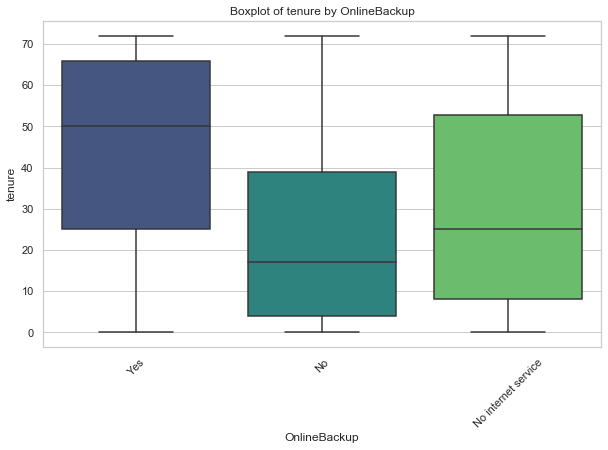

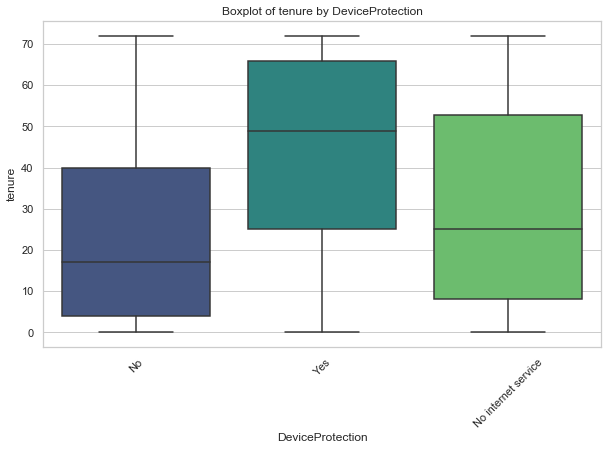

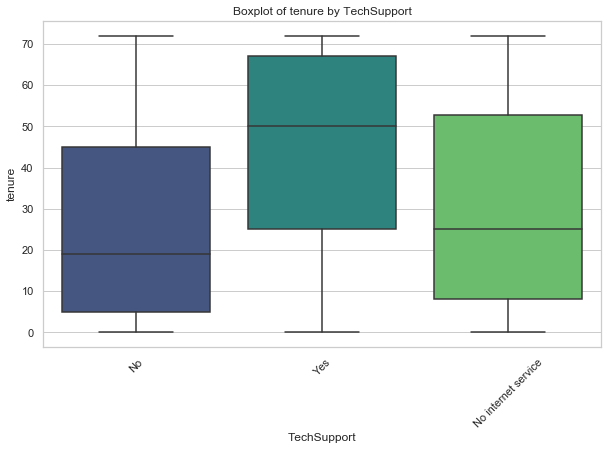

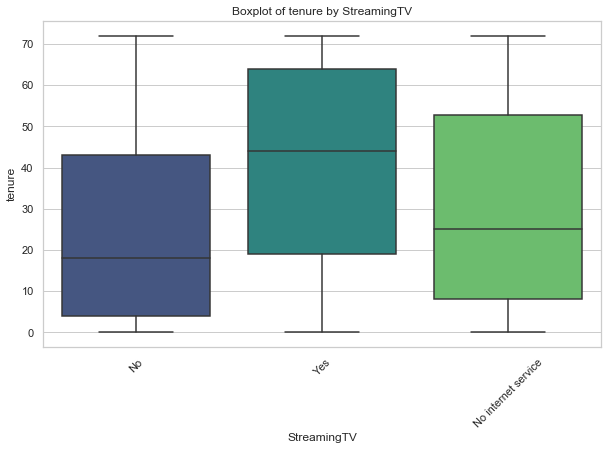

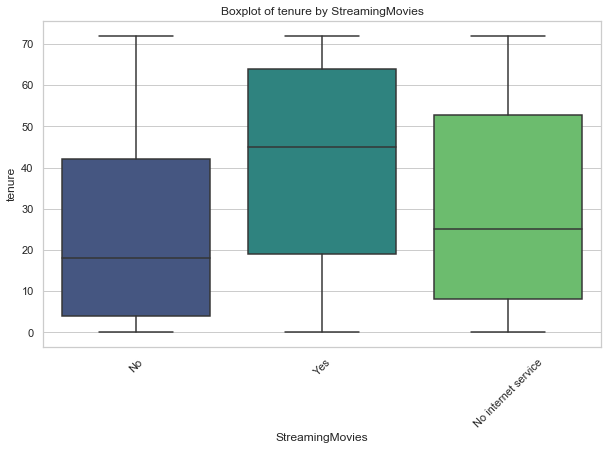

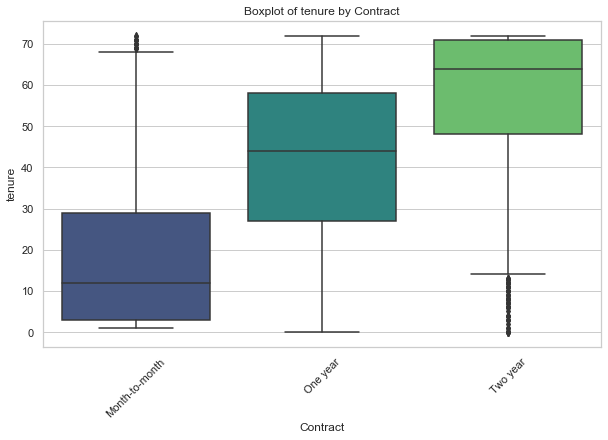

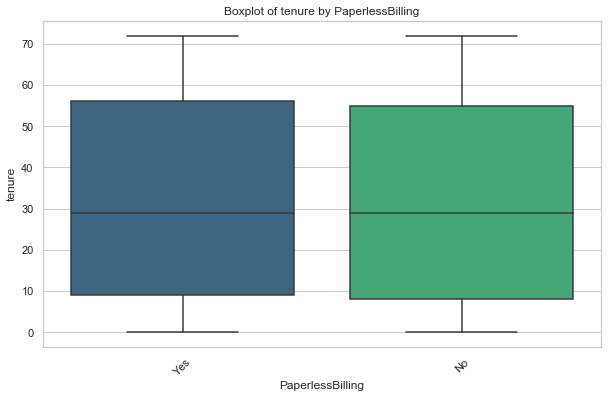

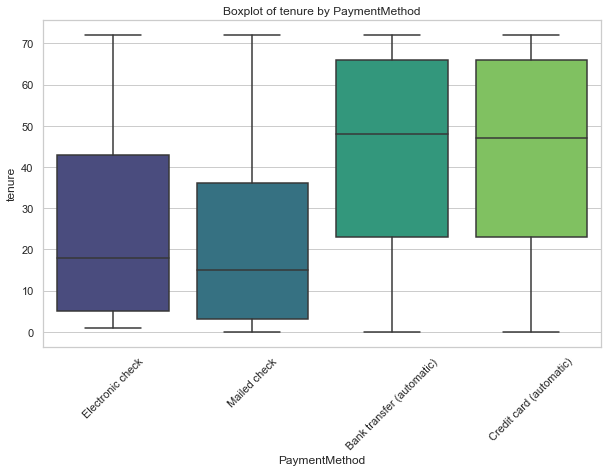

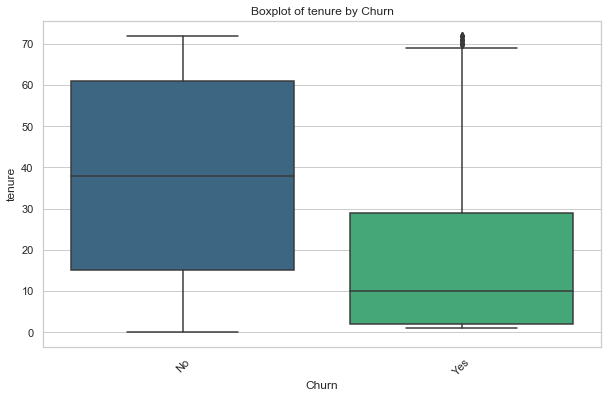

In [83]:
# Bivariate analysis: Boxplots for relationship between categorical and numerical variables
for cat_col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=cat_col, y='tenure', palette='viridis')
    plt.title(f'Boxplot of tenure by {cat_col}')
    plt.xlabel(cat_col)
    plt.ylabel('tenure')
    plt.xticks(rotation=45)
    plt.show()

In [84]:
#Multivariate Analysis

In [86]:
# Compute the correlation matrix
correlation_matrix = df[numerical_columns].corr()



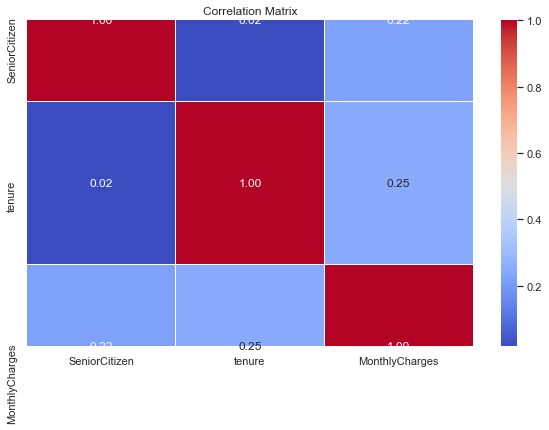

In [91]:
# Plot heatmap for the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.1)
plt.title('Correlation Matrix')
plt.show()



In [ ]:
#SPLITTING

In [110]:
from sklearn.model_selection import train_test_split

# Define independent variable (feature)
X = df[['MonthlyCharges']]  # Independent variable (feature)


In [112]:
# Define target variable
y = df['Churn']  # Target variable

In [114]:

# Split the dataset into training and testing sets
# Here, we allocate 80% of the data for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [135]:

#CHOOSING MODEL, we have chosen Decision Tree Model


In [121]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


In [128]:

# Assuming you have a CSV file named 'telecom_dataset.csv'
# Load the dataset
df2 = pd.read_csv('Telco-Customer-Churn.csv')


In [129]:

# Split the dataset into training and testing sets
X = telecom_data[['MonthlyCharges']]  # Independent variable
y = telecom_data['Churn']             # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [130]:

# Initialize Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)


In [131]:

# Train the model
model.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [132]:
# Predictions on the testing data
y_pred = model.predict(X_test)


In [133]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.6926898509581263

Classification Report:
              precision    recall  f1-score   support

          No       0.75      0.87      0.81      1036
         Yes       0.35      0.20      0.25       373

    accuracy                           0.69      1409
   macro avg       0.55      0.53      0.53      1409
weighted avg       0.65      0.69      0.66      1409



In [ ]:
#This result is from the evaluation of a classification model, specifically a decision tree classifier, 
#the conclusion is the customers which are not doing more recharge will be eligible for the churn